### Data url: 
https://github.com/adsum-ss/DA-Cohort.009-CW/blob/main/Data/Euroleague_2020-2021/Euroleague%202020-2021-2.csv

## Sorular
    1. Sütün açıklamaları eklenmesi(İngilizce),
    2.Minutes sütünündan sonrakileri maç sayısına bölerek ortalama ile çalışma, yeni bir DF e atayıp ondan devam edilebiliriz. 
    3.Oyuncuları mevkilerine göre göre gruplayarak sütünlar arasındaki corelasyon incelenmesi,
    4.Mevki ayrımı yapıldıktan sonra oynanan zaman a göre karşılaştırma (Örn. 20 dk altı veya üstü),
    5.Num sütünü String olabilir.
    6.Sütünları kullanarak Oyuncunun başarı puanı PIR'ile orantılı  olup olmadığı incelenebilir.
    

### Contents of the Notebook:

Part1: Exploratory Data Analysis(EDA):

1)Analysis of the features.

2)Finding any relations or trends considering multiple features.

Part2: Feature Engineering and Data Cleaning:

1)Adding any few features.

2)Removing redundant features.

## Feature Information:
...

### Tasks
...

## Part1: Exploratory Data Analysis(EDA)

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats.mstats import winsorize

#plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/adsum-ss/DA-Cohort.009-CW/main/Data/Euroleague_2020-2021/Euroleague%202020-2021.csv')
data.head(5)

,Player,Club,Number,Position,Country,Age,Height,Games,Minutes,2FG,...,Rebounds,Assists,Steals,Turnovers,Blocks(Fv),Blocks(Ag),Fouls(Cm),Fouls(Rv),PIR,PIR(Avg)
0,Adam Hanga,FC Barcelona,8,Forward,Hungary,31,200,41,652,48/101,...,90,69,32,48,11,5,77,47,198,4.8
1,Adrien Moerman,Anadolu Efes,18,Forward,France,32,202,41,841,72/119,...,189,45,24,39,6,7,60,51,347,8.5
2,Alex Abrines,FC Barcelona,21,Forward,Spain,27,198,39,730,22/50,...,72,26,22,13,8,7,96,39,182,4.7
3,Alexander Khomenko,CSKA Moscow,4,Guard,Russia,21,192,16,100,9/17,...,4,4,0,8,0,1,24,24,15,0.9
4,Andrea Cinciarini,AX Armani Exchange Milan,20,Guard,Italy,34,193,8,19,0/0,...,2,2,0,2,0,0,5,2,-3,-0.4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 23 columns):
Player        65 non-null object
Club          65 non-null object
Number        65 non-null int64
Position      65 non-null object
Country       65 non-null object
Age           65 non-null int64
Height        65 non-null int64
Games         65 non-null int64
Minutes       65 non-null int64
2FG           65 non-null object
3FG           65 non-null object
FT            65 non-null object
Points        65 non-null int64
Rebounds      65 non-null int64
Assists       65 non-null int64
Steals        65 non-null int64
Turnovers     65 non-null int64
Blocks(Fv)    65 non-null int64
Blocks(Ag)    65 non-null int64
Fouls(Cm)     65 non-null int64
Fouls(Rv)     65 non-null int64
PIR           65 non-null int64
PIR(Avg)      65 non-null float64
dtypes: float64(1), int64(15), object(7)
memory usage: 11.8+ KB


In [4]:
data.describe()

,Number,Age,Height,Games,Minutes,Points,Rebounds,Assists,Steals,Turnovers,Blocks(Fv),Blocks(Ag),Fouls(Cm),Fouls(Rv),PIR,PIR(Avg)
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,18.646154,28.800000,200.430769,27.030769,503.969231,205.507692,74.092308,41.800000,16.153846,29.107692,6.169231,6.215385,49.369231,51.815385,223.138462,6.878462
std,17.294716,4.327239,8.407529,12.608243,346.680237,174.406505,57.446095,50.863236,13.212483,26.734881,6.868336,6.863609,31.542912,50.444243,193.237376,5.447347
min,0.000000,18.000000,182.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,-0.700000
25%,7.000000,26.000000,193.000000,15.000000,174.000000,41.000000,21.000000,10.000000,5.000000,9.000000,0.000000,1.000000,24.000000,10.000000,41.000000,2.600000
50%,15.000000,29.000000,201.000000,32.000000,523.000000,172.000000,70.000000,27.000000,14.000000,20.000000,4.000000,4.000000,45.000000,39.000000,182.000000,5.900000
75%,23.000000,31.000000,206.000000,37.000000,814.000000,323.000000,113.000000,48.000000,25.000000,41.000000,10.000000,9.000000,75.000000,72.000000,389.000000,10.900000
max,99.000000,40.000000,221.000000,41.000000,1200.000000,668.000000,196.000000,266.000000,48.000000,123.000000,31.000000,28.000000,106.000000,198.000000,701.000000,19.700000


In [5]:
list(data.columns)

['Player',
 'Club',
 'Number',
 'Position',
 'Country',
 'Age',
 'Height',
 'Games',
 'Minutes',
 '2FG',
 '3FG',
 'FT',
 'Points',
 'Rebounds',
 'Assists',
 'Steals',
 'Turnovers',
 'Blocks(Fv)',
 'Blocks(Ag)',
 'Fouls(Cm)',
 'Fouls(Rv)',
 'PIR',
 'PIR(Avg)']

In [6]:
data.isnull().sum() 

Player        0
Club          0
Number        0
Position      0
Country       0
Age           0
Height        0
Games         0
Minutes       0
2FG           0
3FG           0
FT            0
Points        0
Rebounds      0
Assists       0
Steals        0
Turnovers     0
Blocks(Fv)    0
Blocks(Ag)    0
Fouls(Cm)     0
Fouls(Rv)     0
PIR           0
PIR(Avg)      0
dtype: int64

Let's begin to implement EDA Process to all columns

Focus on numerical and categorical data seperately.
Detect Number of Unique values of each column.
Detect relationships and correlations between independent variables 
Visualize class frequencies and distributions.
Create statistical summaries for continuous variables

Types Of Features
Categorical Features:
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.

In [7]:
#Categorical Features in the dataset: 

adding new columns that includes:
1- avarage of columns expct. Age, height,min and  games
2-Rebound Avg
3-

Ordinal Features:
An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like Height with values Tall, Medium, Short, then Height is a ordinal variable. Here we can have a relative sort in the variable.

In [8]:
#Ordinal Features in the dataset:

Continous Feature:
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

In [9]:
#Continous Features in the dataset:

## Analysing The Features

In [10]:
x= data.groupby(['Country','Points'])['Points'].count()
x

Country             Points
Bosnia&Herzegovina  0         1
Croatia             362       1
Denmark             170       1
                    497       1
France              35        1
                             ..
USA                 512       1
                    515       1
                    522       1
                    528       1
Ukraine             42        1
Name: Points, Length: 64, dtype: int64

In [11]:
print('Oldest Player was of:',data['Age'].max(),'Years')
print('Youngest Player was of:',data['Age'].min(),'Years')
print('Average Age on the data:',data['Age'].mean(),'Years')

Oldest Player was of: 40 Years
Youngest Player was of: 18 Years
Average Age on the data: 28.8 Years


In [12]:
print('Heighest Player was of:',data['Height'].max(),'cm')
print('shortest Player was of:',data['Height'].min(),'cm')
print('Average Height on the data:',data['Height'].mean(),'cm')

Heighest Player was of: 221 cm
shortest Player was of: 182 cm
Average Height on the data: 200.43076923076924 cm


In [44]:
data.groupby("Club")["Age_Grouped"].value_counts(dropna = False)

Club                      Age_Grouped
AX Armani Exchange Milan  Young           8
                          Middle_Age      7
                          Teen            1
Anadolu Efes              Young          10
                          Teen            4
                          Middle_Age      2
CSKA Moscow               Young          11
                          Teen            3
                          Middle_Age      2
FC Barcelona              Young          12
                          Teen            4
                          Middle_Age      1
Name: Age_Grouped, dtype: int64

In [45]:
data.Age_Grouped.value_counts(dropna = False)

Young         41
Middle_Age    12
Teen          12
Name: Age_Grouped, dtype: int64

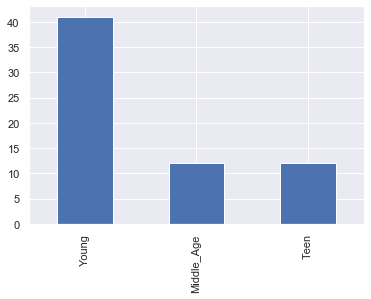

In [43]:
data.Age_Grouped.value_counts(dropna = False).plot(kind = "bar")

In [16]:
data.Country.value_counts(dropna = False)

USA                   16
Italy                  8
Spain                  7
Turkey                 6
Russia                 6
France                 4
Serbia                 3
Germany                2
Denmark                2
Latvia                 2
Hungary                1
Senegal                1
Slovakia               1
Greece                 1
Bosnia&Herzegovina     1
Nigeria                1
Croatia                1
Georgia                1
Ukraine                1
Name: Country, dtype: int64

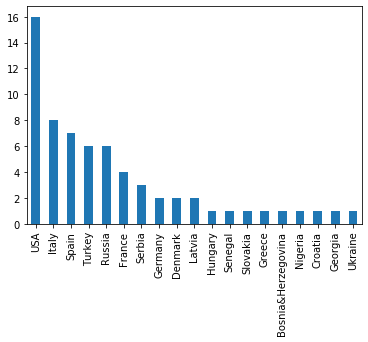

In [17]:
data.Country.value_counts(dropna = False).plot(kind = "bar")

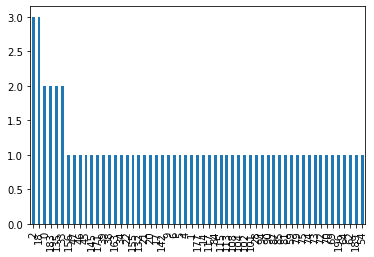

In [18]:
data.Rebounds.value_counts(dropna=False).plot(kind = "bar")

In [19]:
data.groupby('Club')['Points'].describe().T

Club,AX Armani Exchange Milan,Anadolu Efes,CSKA Moscow,FC Barcelona
count,16.000000,16.000000,16.000000,17.000000
mean,209.000000,215.812500,205.062500,192.941176
std,176.094672,202.250742,158.323495,174.540637
min,0.000000,0.000000,0.000000,0.000000
25%,58.000000,30.500000,70.750000,41.000000
50%,169.500000,210.500000,164.500000,190.000000
75%,360.000000,303.500000,315.500000,320.000000
max,515.000000,668.000000,522.000000,514.000000


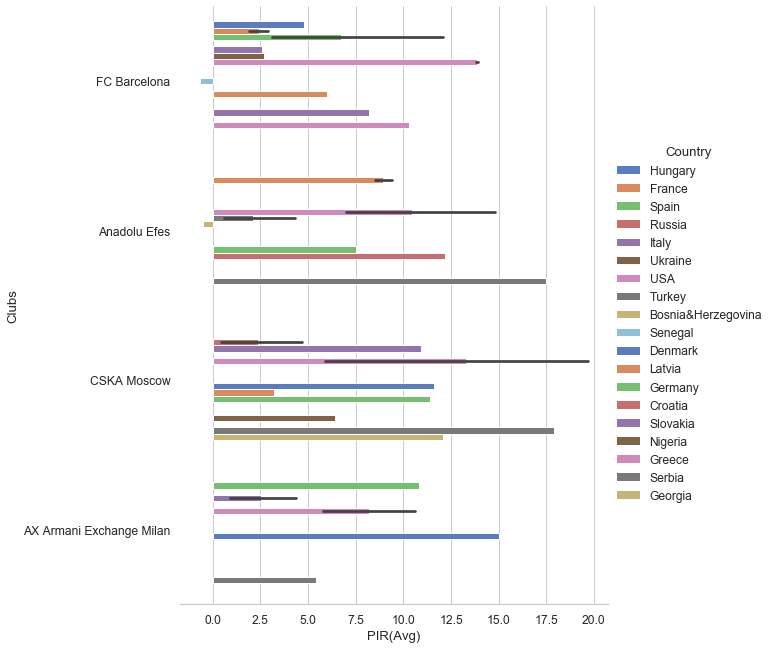

In [20]:
sns.set(style="whitegrid", font_scale = 1.1)

g = sns.catplot(x="PIR(Avg)", y="Club", hue="Country", data=data,height=9, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Clubs")

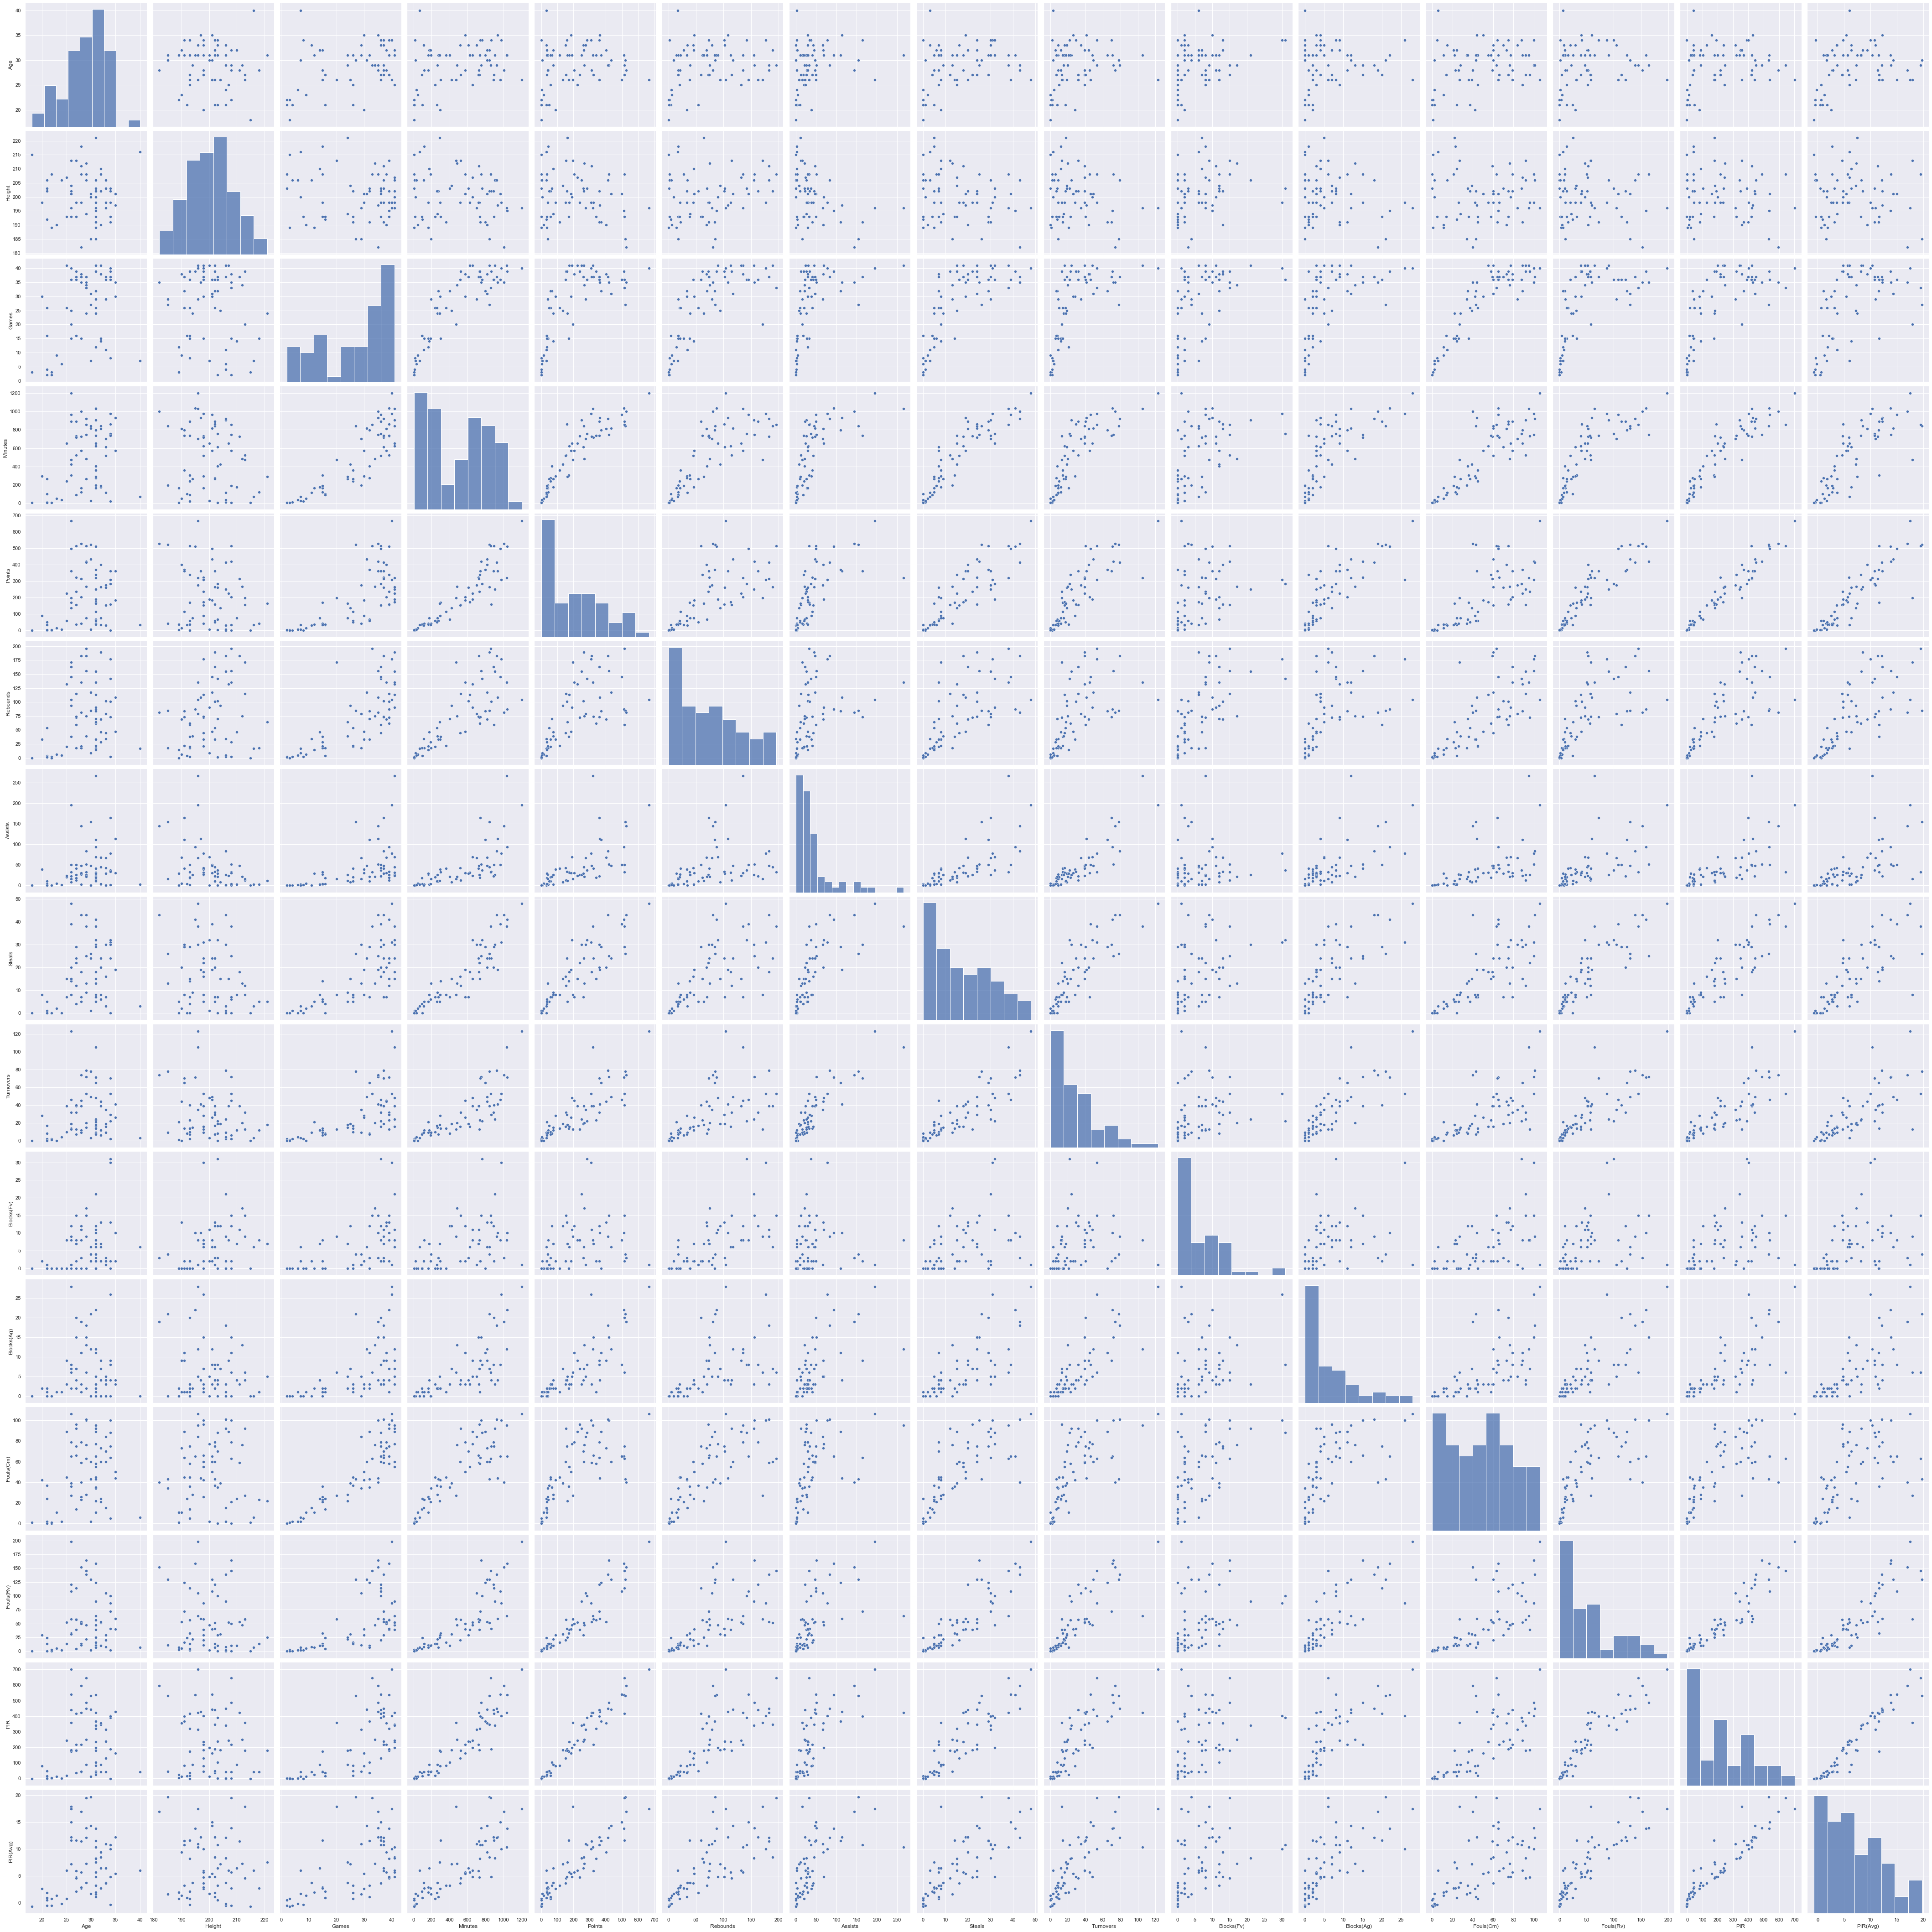

In [46]:
sns.set()

cols=['Age', 'Height', 'Games', 'Minutes', 'Points', 'Rebounds','Assists', 'Steals', 'Turnovers', 'Blocks(Fv)', 'Blocks(Ag)','Fouls(Cm)', 'Fouls(Rv)', 'PIR', 'PIR(Avg)']


sns.pairplot(data[cols], size = 4)

plt.show()

In [22]:
#sorted(data[''].unique())  

In [23]:
data.corr().columns

Index(['Number', 'Age', 'Height', 'Games', 'Minutes', 'Points', 'Rebounds',
       'Assists', 'Steals', 'Turnovers', 'Blocks(Fv)', 'Blocks(Ag)',
       'Fouls(Cm)', 'Fouls(Rv)', 'PIR', 'PIR(Avg)'],
      dtype='object')

(20, 0)

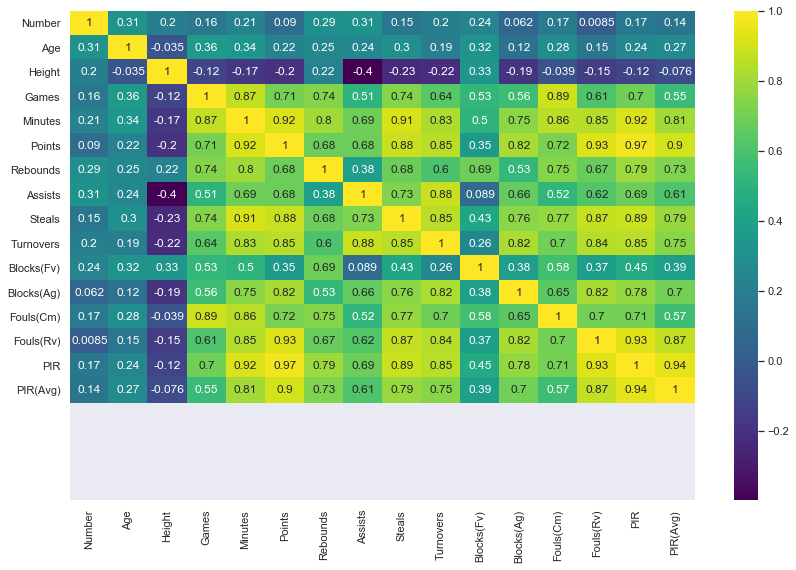

In [24]:
plt.figure(figsize=(14,9))
sns.heatmap(data.corr(),annot=True,cmap='viridis')
plt.ylim(20, 0)    

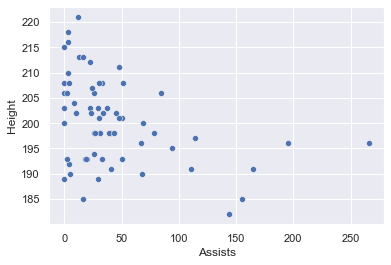

In [25]:
sns.scatterplot(x='Assists',y='Height',data=data,)

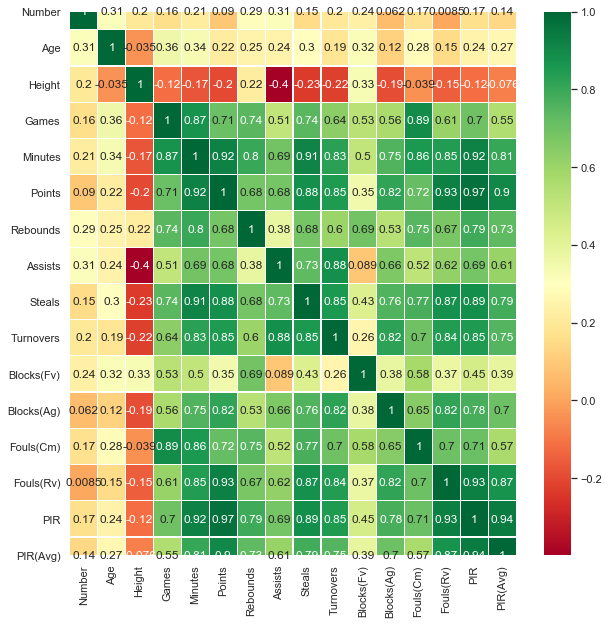

In [47]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

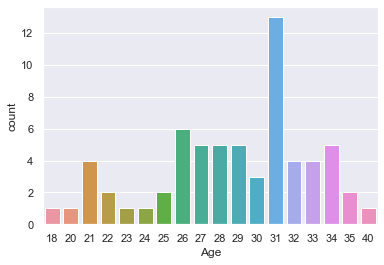

In [27]:
sns.countplot(x='Age',data=data) 

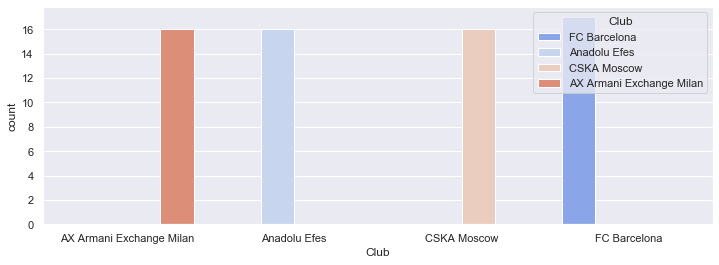

In [42]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(data['Club'].unique())
sns.countplot(x='Club',data=data,order = subgrade_order,palette='coolwarm' ,hue='Club')

In [41]:
data["Club"].value_counts(dropna = False)

FC Barcelona                17
Anadolu Efes                16
CSKA Moscow                 16
AX Armani Exchange Milan    16
Name: Club, dtype: int64

In [30]:
df1=data.groupby(["Club","Player"])["Points"].value_counts()

In [31]:
df1

Club                      Player             Points
AX Armani Exchange Milan  Andrea Cinciarini  0         1
                          Davide Moretti     2         1
                          Jeff Brooks        67        1
                          Jeremy Evans       31        1
                          Kaleb Tarczewski   155       1
                                                      ..
FC Barcelona              Pierre Oriola      204       1
                          Rolands Smits      224       1
                          Sergi Martinez     49        1
                          Thomas Huertel     35        1
                          Victor Claver      34        1
Name: Points, Length: 65, dtype: int64

18-25: 1
26-32:2
33-40:3

In [32]:
def func(x):
    if x <26 :
        return "Teen"
    elif 25<x < 33:
        return "Young"
    else:
        return "Middle_Age"
    
    # Add elif statements....

data['Age_Grouped'] = data['Age'].apply(func)

In [33]:
data.head(5)

,Player,Club,Number,Position,Country,Age,Height,Games,Minutes,2FG,...,Assists,Steals,Turnovers,Blocks(Fv),Blocks(Ag),Fouls(Cm),Fouls(Rv),PIR,PIR(Avg),Age_Grouped
0,Adam Hanga,FC Barcelona,8,Forward,Hungary,31,200,41,652,48/101,...,69,32,48,11,5,77,47,198,4.8,Young
1,Adrien Moerman,Anadolu Efes,18,Forward,France,32,202,41,841,72/119,...,45,24,39,6,7,60,51,347,8.5,Young
2,Alex Abrines,FC Barcelona,21,Forward,Spain,27,198,39,730,22/50,...,26,22,13,8,7,96,39,182,4.7,Young
3,Alexander Khomenko,CSKA Moscow,4,Guard,Russia,21,192,16,100,9/17,...,4,0,8,0,1,24,24,15,0.9,Teen
4,Andrea Cinciarini,AX Armani Exchange Milan,20,Guard,Italy,34,193,8,19,0/0,...,2,0,2,0,0,5,2,-3,-0.4,Middle_Age


In [34]:
order_ = ["Teen", "Young", "Middle_Age"]

In [35]:
data['Age_Grouped'] = pd.Categorical(data['Age_Grouped'], ordered = True, categories = order_)
data.head(5)

,Player,Club,Number,Position,Country,Age,Height,Games,Minutes,2FG,...,Assists,Steals,Turnovers,Blocks(Fv),Blocks(Ag),Fouls(Cm),Fouls(Rv),PIR,PIR(Avg),Age_Grouped
0,Adam Hanga,FC Barcelona,8,Forward,Hungary,31,200,41,652,48/101,...,69,32,48,11,5,77,47,198,4.8,Young
1,Adrien Moerman,Anadolu Efes,18,Forward,France,32,202,41,841,72/119,...,45,24,39,6,7,60,51,347,8.5,Young
2,Alex Abrines,FC Barcelona,21,Forward,Spain,27,198,39,730,22/50,...,26,22,13,8,7,96,39,182,4.7,Young
3,Alexander Khomenko,CSKA Moscow,4,Guard,Russia,21,192,16,100,9/17,...,4,0,8,0,1,24,24,15,0.9,Teen
4,Andrea Cinciarini,AX Armani Exchange Milan,20,Guard,Italy,34,193,8,19,0/0,...,2,0,2,0,0,5,2,-3,-0.4,Middle_Age


In [56]:
data.Age==40

0     False
1     False
2     False
3     False
4     False
      ...  
60    False
61    False
62    False
63    False
64    False
Name: Age, Length: 65, dtype: bool

In [36]:
data.Age.max()

40

In [37]:
data.Age_Grouped.max()

'Middle_Age'

In [38]:
data.Age_Grouped.sort_values()

32          Teen
20          Teen
48          Teen
18          Teen
17          Teen
         ...    
29    Middle_Age
61    Middle_Age
30    Middle_Age
51    Middle_Age
34    Middle_Age
Name: Age_Grouped, Length: 65, dtype: category
Categories (3, object): [Teen < Young < Middle_Age]

In [48]:
data["PIR(Avg)"].mean()

6.878461538461538

In [49]:
data["PIR"].mean()

223.13846153846154

In [58]:
data.loc[data['Age'] == 40]

,Player,Club,Number,Position,Country,Age,Height,Games,Minutes,2FG,...,Assists,Steals,Turnovers,Blocks(Fv),Blocks(Ag),Fouls(Cm),Fouls(Rv),PIR,PIR(Avg),Age_Grouped
43,Pau Gasol,FC Barcelona,16,Center,Spain,40,216,7,69,9/21,...,3,3,3,6,0,6,7,42,6.0,Middle_Age
